In [1]:
### Plot the distribution of NR remap peaks on a genomic meta exon by nb of remap overlap in exons

## Packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib
from pathlib import Path
import collections
from scipy.interpolate import interp1d
matplotlib.rcParams['pdf.fonttype'] = 42

## Functions
def summit_distribution(file, species):
    result = {}
    with open(file) as f:
        for line in f:
            strand = line.strip().split()[5]
            exon_start = line.strip().split()[1]
            exon_end = line.strip().split()[2]
            peak = line.strip().split()[8]

            size_exon = int(exon_end) - int(exon_start)
            middle_exon = int(exon_start) + round(size_exon/2)

            if strand == "-": #we need to reverse the neg strand results based on the exon
                # peak behind exon
                if int(peak) < middle_exon:
                    perc_place = middle_exon - int(peak) #reversed 

                    if perc_place not in result:
                        result[perc_place] = 1
                    else:
                        result[perc_place] += 1

                # peak in front of exon
                elif int(peak) >= middle_exon:
                    place_peak = int(peak) - middle_exon

                    perc_place = 0-place_peak #reversed


                    if perc_place not in result:
                        result[perc_place] = 1
                    else:
                        result[perc_place] += 1

            #strand + is no change            
            else:
                # peak behind exon
                if int(peak) < middle_exon:
                    place_peak = middle_exon - int(peak)
                    perc_place = 0-place_peak

                    if perc_place not in result:
                        result[perc_place] = 1
                    else:
                        result[perc_place] += 1

                # peak in front of exon
                elif int(peak) >= middle_exon:
                    perc_place = int(peak) - middle_exon

                    if perc_place not in result:
                        result[perc_place] = 1
                    else:
                        result[perc_place] += 1
    
    # Filter extremes result (on the sides) for better plotting
    result_filtered = {}
    if species == "hg" or species == "mm":
        cutoff = -1000
    else:
        cutoff = -400 #dm and atha

    for key,item in result.items():
        if key < cutoff or key > abs(cutoff):  
            continue
        else:
            result_filtered[key]=item
    
    return result_filtered

In [2]:
### Compute distribution
hg5 = summit_distribution("/home/mouren/Data/final_files_tokeep/other_species/files_remap_distrib/hg5", "hg") 
mm5 = summit_distribution("/home/mouren/Data/final_files_tokeep/other_species/files_remap_distrib/mm5", "mm") 
dm5 = summit_distribution("/home/mouren/Data/final_files_tokeep/other_species/files_remap_distrib/dm5", "dm") 
tair5 = summit_distribution("/home/mouren/Data/final_files_tokeep/other_species/files_remap_distrib/tair5", "tair") 

hg510 = summit_distribution("/home/mouren/Data/final_files_tokeep/other_species/files_remap_distrib/hg5_10", "hg") 
mm510 = summit_distribution("/home/mouren/Data/final_files_tokeep/other_species/files_remap_distrib/mm5_10", "mm") 
dm510 = summit_distribution("/home/mouren/Data/final_files_tokeep/other_species/files_remap_distrib/dm5_10", "dm") 
tair510 = summit_distribution("/home/mouren/Data/final_files_tokeep/other_species/files_remap_distrib/tair5_10", "tair") 

hg10 = summit_distribution("/home/mouren/Data/final_files_tokeep/other_species/files_remap_distrib/hg10", "hg") 
mm10 = summit_distribution("/home/mouren/Data/final_files_tokeep/other_species/files_remap_distrib/mm10", "mm") 
dm10 = summit_distribution("/home/mouren/Data/final_files_tokeep/other_species/files_remap_distrib/dm10", "dm") 
tair10 = summit_distribution("/home/mouren/Data/final_files_tokeep/other_species/files_remap_distrib/tair10", "tair") 

In [3]:
### Normalize by total of exons
hg5_norm = {}
mm5_norm = {}
dm5_norm = {}
tair5_norm = {}

hg510_norm = {}
mm510_norm = {}
dm510_norm = {}
tair510_norm = {}

hg10_norm = {}
mm10_norm = {}
dm10_norm = {}
tair10_norm = {}

cpt = len({line.split('\t')[3] for line in open("/home/mouren/Data/final_files_tokeep/other_species/files_remap_distrib/hg5")})
for key,value in hg5.items():
    hg5_norm[key] = value / cpt
cpt = len({line.split('\t')[3] for line in open("/home/mouren/Data/final_files_tokeep/other_species/files_remap_distrib/mm5")})
for key, value in mm5.items():
    mm5_norm[key] = value / cpt
cpt = len({line.split('\t')[3] for line in open("/home/mouren/Data/final_files_tokeep/other_species/files_remap_distrib/dm5")})
for key, value in dm5.items():
    dm5_norm[key] = value / cpt
cpt = len({line.split('\t')[3] for line in open("/home/mouren/Data/final_files_tokeep/other_species/files_remap_distrib/tair5")})
for key, value in tair5.items():
    tair5_norm[key] = value / cpt

cpt = len({line.split('\t')[3] for line in open("/home/mouren/Data/final_files_tokeep/other_species/files_remap_distrib/hg5_10")})
for key, value in hg510.items():
    hg510_norm[key] = value / cpt
cpt = len({line.split('\t')[3] for line in open("/home/mouren/Data/final_files_tokeep/other_species/files_remap_distrib/mm5_10")})
for key, value in mm510.items():
    mm510_norm[key] = value / cpt
cpt = len({line.split('\t')[3] for line in open("/home/mouren/Data/final_files_tokeep/other_species/files_remap_distrib/dm5_10")})
for key, value in dm510.items():
    dm510_norm[key] = value / cpt
cpt = len({line.split('\t')[3] for line in open("/home/mouren/Data/final_files_tokeep/other_species/files_remap_distrib/tair5_10")})
for key, value in tair510.items():
    tair510_norm[key] = value / cpt

cpt = len({line.split('\t')[3] for line in open("/home/mouren/Data/final_files_tokeep/other_species/files_remap_distrib/hg10")})
for key, value in hg10.items():
    hg10_norm[key] = value / cpt
cpt = len({line.split('\t')[3] for line in open("/home/mouren/Data/final_files_tokeep/other_species/files_remap_distrib/mm10")})
for key, value in mm10.items():
    mm10_norm[key] = value / cpt
cpt = len({line.split('\t')[3] for line in open("/home/mouren/Data/final_files_tokeep/other_species/files_remap_distrib/dm10")})
for key, value in dm10.items():
    dm10_norm[key] = value / cpt
cpt = len({line.split('\t')[3] for line in open("/home/mouren/Data/final_files_tokeep/other_species/files_remap_distrib/tair10")})
for key, value in tair10.items():
    tair10_norm[key] = value / cpt

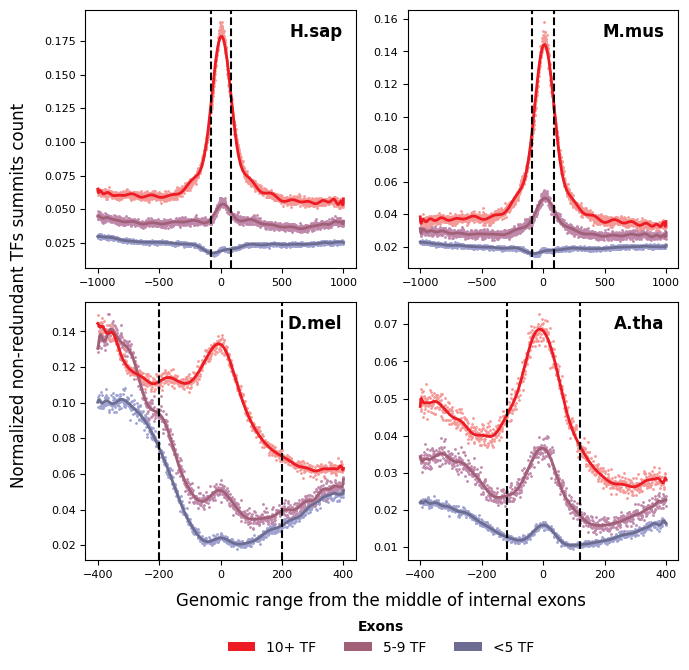

In [4]:
species_data = [
    [ 
        (hg5_norm, hg510_norm, hg10_norm, "H.sap"), 
        (mm5_norm, mm510_norm, mm10_norm, "M.mus"), 
      
    ],
    [ 
        (dm5_norm, dm510_norm, dm10_norm, "D.mel"), 
        (tair5_norm, tair510_norm, tair10_norm, "A.tha"), 

    ],
]

#################################
# 3. HELPER FUNCTION TO PLOT ONE PAIR
#################################
def plot_pair(ax, analysis_5, analysis_510, analysis_10, subplot_title, poly_order=33):
    # 1) 5 
    x_analysis5 = list(analysis_5.keys())
    y_analysis5 = list(analysis_5.values())
    if len(x_analysis5) > poly_order:  # ensure enough points to fit
        model_analysis5 = np.poly1d(np.polyfit(x_analysis5, y_analysis5, poly_order))
    else:
        # fallback: lower-order fit or direct connect
        model_analysis5 = None

    # 2) 5_10
    x_analysis510 = list(analysis_510.keys())
    y_analysis510 = list(analysis_510.values())
    if len(x_analysis510) > poly_order:  # ensure enough points to fit
        model_analysis510 = np.poly1d(np.polyfit(x_analysis510, y_analysis510, poly_order))
    else:
        # fallback: lower-order fit or direct connect
        model_analysis510 = None

    # 3) 10
    x_analysis10 = list(analysis_10.keys())
    y_analysis10 = list(analysis_10.values())
    if len(x_analysis10) > poly_order:  # ensure enough points to fit
        model_analysis10 = np.poly1d(np.polyfit(x_analysis10, y_analysis10, poly_order))
    else:
        # fallback: lower-order fit or direct connect
        model_analysis10 = None

    ## Scatter raw points
    if subplot_title == "H.sap" or subplot_title == "M.mus":
        cutoff = 1000
    else:
        cutoff = 400

    ax.scatter(x_analysis5, y_analysis5, color="#9fa2d1", s=1, label='<5 TF')
    if model_analysis5:
        myline = np.linspace(min(x_analysis5), max(x_analysis5), cutoff) #1000 for hsap and mm; 400 for dm and tair
        ax.plot(myline, model_analysis5(myline), color="#6c6d91", label='<5 TF', linewidth=2)

    ax.scatter(x_analysis510, y_analysis510, color="#c089ab", s=1, label='5-9 TF')
    if model_analysis510:
        myline = np.linspace(min(x_analysis510), max(x_analysis510), cutoff) #1000 for hsap and mm; 400 for dm and tair
        ax.plot(myline, model_analysis510(myline), color="#a16077", label='5-9 TF', linewidth=2)

    ax.scatter(x_analysis10, y_analysis10, color="#f59997", s=1, label='10+ TF')
    if model_analysis10:
        myline = np.linspace(min(x_analysis10), max(x_analysis10), cutoff) #1000 for hsap and mm; 400 for dm and tair
        ax.plot(myline, model_analysis10(myline), color="#ed1c24", label='10+ TF', linewidth=2)

    # Example vertical lines (adjust to your data)
    #Hsap is 164 so 82; Dmel is 400 so 200; Mmus is 177 so 88; Atha is 239 so 119
    if subplot_title == "H.sap":
        mean_exon_size = -82
    elif subplot_title == "M.mus":
        mean_exon_size = -88
    elif subplot_title == "D.mel":
        mean_exon_size = -200
    else:
        mean_exon_size = -119

    ax.axvline(x=abs(mean_exon_size),  color='k', linestyle='--', label='Mean size boundary')
    ax.axvline(x=mean_exon_size, color='k', linestyle='--')

#################################
# 4. CREATE THE SUBPLOTS
#################################
from matplotlib.ticker import LinearLocator, FormatStrFormatter, MaxNLocator

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 6), sharey=False)
# - sharey=True means all subplots share the same y-scale

# Loop over each row (species) and each column (region)
for row_idx, species_row in enumerate(species_data):
    for col_idx, (analysis_5, analysis_510, analysis_10, subplot_title) in enumerate(species_row):
        ax = axes[row_idx, col_idx]

        plot_pair(ax, analysis_5, analysis_510, analysis_10, subplot_title)
        
        # y axis ticks 
        #ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
        # If you already have an Axes object "ax"
        ax.tick_params(axis='y', labelsize=8)  # Use labelsize=8 (or another number) to reduce font size
        ax.tick_params(axis='x', labelsize=8)

        ## Plot species name 
        ax_coor = axes[row_idx, col_idx]
        
        # Place text near top-right corner of that Axes
        # (0.95, 0.95) in "axes fraction" coordinates => 95% from the left, 95% from bottom
        ax_coor.text(
            0.95, 0.95,          # x, y in Axes coordinates
            subplot_title,
            transform=ax_coor.transAxes,
            ha='right',          # align text to the right
            va='top',            # align text to the top
            fontsize=12,
            fontweight='bold'
        )


###  Legend and axis title
## Legend
from matplotlib.patches import Patch
from matplotlib import font_manager

c1 = Patch(facecolor='#ed1c24', label="10+ TF")
c2 = Patch(facecolor='#a16077', label="5-9 TF")
c3 = Patch(facecolor='#6c6d91', label="<5 TF")

fig.legend(
    handles=[c1, c2, c3],
    loc='lower center', bbox_to_anchor=(0.55, -0.12), title="Exons",
    title_fontproperties=font_manager.FontProperties(weight='bold'),  # Make title bold
    ncol=3,
    fontsize=10, frameon=False
)

## Axes
fig.text(0.55, -0.01, "Genomic range from the middle of internal exons", ha='center', va='center', fontsize=12)
fig.supylabel("Normalized non-redundant TFs summits count",fontsize=12)

plt.tight_layout()

plt.savefig("/home/mouren/Images/tls1/supplementary_figures/supp_fig1/distrib_remap_exons_by_nb_ovlp_all_species.pdf", format="pdf", bbox_inches="tight", dpi=450)
plt.savefig("/home/mouren/Images/tls1/supplementary_figures/supp_fig1/distrib_remap_exons_by_nb_ovlp_all_species.png", format="png", bbox_inches="tight", dpi=450)

plt.show()
